# ダウ指数 日足

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

symbol = '^DJI'
ticker = yf.Ticker(symbol)

#df = ticker.history(period='1y', start='2024-01-01', end='2024-12-31') # All data in 2024
df = ticker.history(period='1y') # All data in 2024
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-29 00:00:00-05:00,38115.828125,38343.929688,38061.171875,38333.449219,312480000,0.0,0.0
2024-01-30 00:00:00-05:00,38298.230469,38497.390625,38257.800781,38467.308594,326640000,0.0,0.0
2024-01-31 00:00:00-05:00,38426.781250,38588.859375,38139.660156,38150.300781,453250000,0.0,0.0
2024-02-01 00:00:00-05:00,38175.339844,38522.500000,38106.839844,38519.839844,321830000,0.0,0.0
2024-02-02 00:00:00-05:00,38448.101562,38783.621094,38336.570312,38654.421875,379760000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-21 00:00:00-05:00,43528.648438,44050.128906,43528.648438,44025.808594,592210000,0.0,0.0
2025-01-22 00:00:00-05:00,44178.058594,44208.339844,44042.109375,44156.730469,588430000,0.0,0.0
2025-01-23 00:00:00-05:00,44113.550781,44565.261719,44113.550781,44565.070312,444180000,0.0,0.0


In [2]:
df0 = ticker.history(period='2y')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-30 00:00:00-05:00,33909.210938,34055.289062,33695.179688,33717.089844,343920000,0.0,0.0
2023-01-31 00:00:00-05:00,33803.558594,34095.230469,33664.910156,34086.039062,360240000,0.0,0.0
2023-02-01 00:00:00-05:00,34039.601562,34334.699219,33581.421875,34092.960938,370120000,0.0,0.0
2023-02-02 00:00:00-05:00,34129.300781,34145.140625,33814.781250,34053.941406,429910000,0.0,0.0
2023-02-03 00:00:00-05:00,33926.300781,34179.578125,33813.859375,33926.011719,425150000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-21 00:00:00-05:00,43528.648438,44050.128906,43528.648438,44025.808594,592210000,0.0,0.0
2025-01-22 00:00:00-05:00,44178.058594,44208.339844,44042.109375,44156.730469,588430000,0.0,0.0
2025-01-23 00:00:00-05:00,44113.550781,44565.261719,44113.550781,44565.070312,444180000,0.0,0.0


In [3]:
period = 20
r_last = len(df0)
r1 = 0
df0['Median'] = np.nan
df0['Q1'] = np.nan
df0['Q3'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    med = np.median(df1['Close'])
    q3, q1 = np.percentile(df1['Close'], [75, 25])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)  # 下限を設定
    upper_bound = q3 + (1.5 * iqr)  # 上限を設定
    name_index = df0.index[r2]
    df0.at[name_index, 'Median'] = med
    df0.at[name_index, 'Q1'] = q1
    df0.at[name_index, 'Q3'] = q3
    df0.at[name_index, 'Lower'] = lower_bound
    df0.at[name_index, 'Upper'] = upper_bound
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2023-01-30 00:00:00-05:00,33909.210938,34055.289062,33695.179688,33717.089844,343920000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-01-31 00:00:00-05:00,33803.558594,34095.230469,33664.910156,34086.039062,360240000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-02-01 00:00:00-05:00,34039.601562,34334.699219,33581.421875,34092.960938,370120000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-02-02 00:00:00-05:00,34129.300781,34145.140625,33814.781250,34053.941406,429910000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-02-03 00:00:00-05:00,33926.300781,34179.578125,33813.859375,33926.011719,425150000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-21 00:00:00-05:00,43528.648438,44050.128906,43528.648438,44025.808594,592210000,0.0,0.0,42670.878906,42486.778320,43032.440430,41668.285156,43850.933594
2025-01-22 00:00:00-05:00,44178.058594,44208.339844,44042.109375,44156.730469,588430000,0.0,0.0,42719.343750,42525.839844,43170.234375,41559.248047,44136.826172
2025-01-23 00:00:00-05:00,44113.550781,44565.261719,44113.550781,44565.070312,444180000,0.0,0.0,42786.195312,42540.253906,43240.420898,41490.003418,44290.671387


## 日足チャートと Bollinger's bands

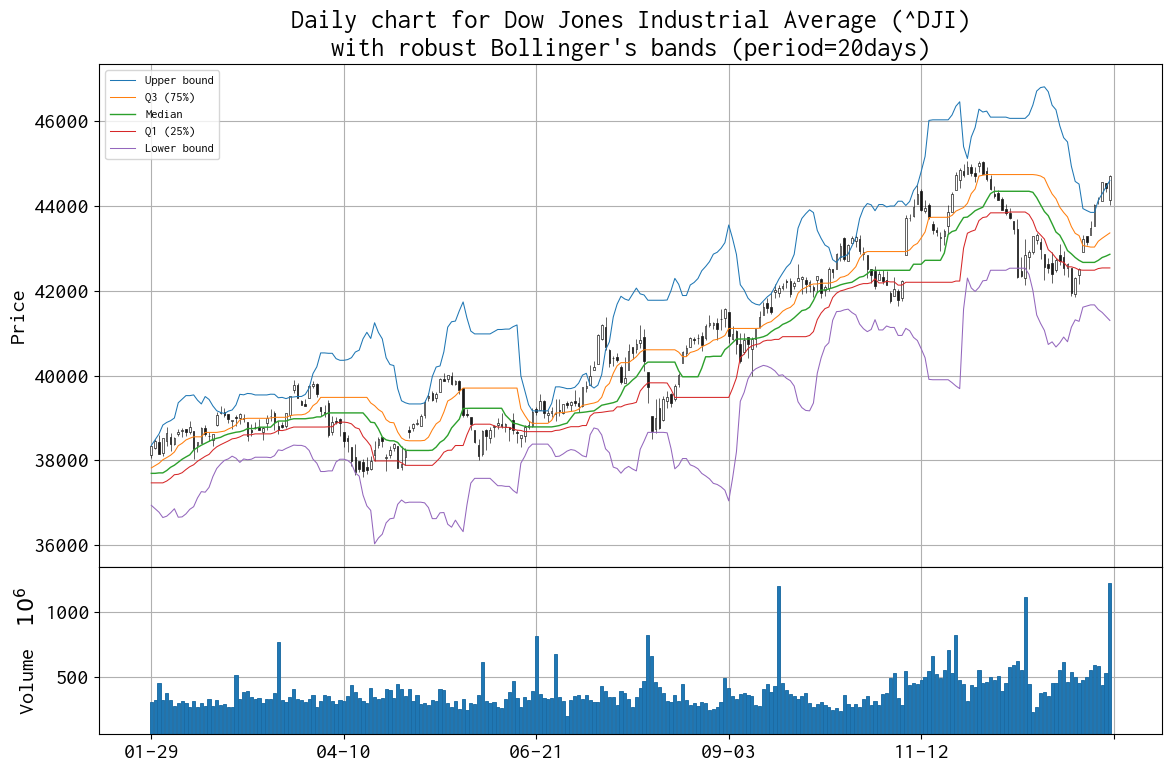

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=0.75, label='Upper bound', ax=ax[0]),
    mpf.make_addplot(mv_q3[df.index], width=0.75, label='Q3 (75%)', ax=ax[0]),
    mpf.make_addplot(mv_median[df.index], width=1, label='Median', ax=ax[0]),
    mpf.make_addplot(mv_q1[df.index], width=0.75, label='Q1 (25%)', ax=ax[0]),
    mpf.make_addplot(mv_lower[df.index], width=0.75, label='Lower bound', ax=ax[0]),
]   

mpf.plot(
    df,
    type='candle',
    style='default',
    volume=ax[1],
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Daily chart for %s (%s)\nwith robust Bollinger\'s bands (period=20days)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Daily chart for %s\nwith robust Bollinger\'s bands (period=20days)' % symbol)

ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('daily_chart_bollinger_robust_dji.png')
plt.show()

In [5]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-28 00:00:00+09:00,39400.019531,39448.550781,38886.050781,39340.148438,0,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-01-24 00:00:00+09:00    39931.980469
2025-01-28 00:00:00+09:00    39340.148438
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-01-24 00:00:00+09:00           NaN
2025-01-28 00:00:00+09:00   -591.832031
Name: Close, dtype: float64

In [8]:
df['Close'].rolling(25).mean()

Date
2024-01-29 00:00:00+09:00             NaN
2024-01-30 00:00:00+09:00             NaN
2024-01-31 00:00:00+09:00             NaN
2024-02-01 00:00:00+09:00             NaN
2024-02-02 00:00:00+09:00             NaN
                                 ...     
2025-01-21 00:00:00+09:00    39248.954688
2025-01-22 00:00:00+09:00    39259.915469
2025-01-23 00:00:00+09:00    39264.304688
2025-01-24 00:00:00+09:00    39282.766250
2025-01-28 00:00:00+09:00    39278.072656
Name: Close, Length: 244, dtype: float64

In [9]:
df['Close'].rolling(75).mean()

Date
2024-01-29 00:00:00+09:00             NaN
2024-01-30 00:00:00+09:00             NaN
2024-01-31 00:00:00+09:00             NaN
2024-02-01 00:00:00+09:00             NaN
2024-02-02 00:00:00+09:00             NaN
                                 ...     
2025-01-21 00:00:00+09:00    38942.302708
2025-01-22 00:00:00+09:00    38965.325365
2025-01-23 00:00:00+09:00    38982.750729
2025-01-24 00:00:00+09:00    39011.060312
2025-01-28 00:00:00+09:00    39021.568177
Name: Close, Length: 244, dtype: float64